## HEALTHCARE MEDICAL CONDITION PREDICTION MODEL
—-----------------------------------------------------------------------------------------------------------

Name: Farisa Hameed

Organization: Entri Elevate


##  Overview of Problem Statement:
Accurately diagnosing medical conditions is crucial for effective treatment planning and patient care. Machine learning models can help classify medical conditions based on patient demographics, test results, and admission details. This project focuses on building a robust classification model to assist in predicting a patient's medical condition.


##  Objective:
To develop a machine learning model to classify patients' medical conditions (e.g., Cancer, Obesity, Diabetes) based on demographic and clinical data.


## Data Description:
Source: Healthcare dataset provided.

Features:
Demographics: Age, Gender, Blood Type.

Medical Details: Test Results, Admission Type, Medication, Insurance Provider.

Administrative Details: Date of Admission, Room Number, Doctor.

Target: Medical Condition (categorical variable).

## Import Libraries and Load Data

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


In [4]:
# Data Collection 
print("\nCollecting Data...")


In [5]:
data=pd.read_csv('healthcare_dataset.csv')
print("\nDataset Loaded....")



Dataset Loaded....


In [6]:
data.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [14]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


---------------

## Data Cleaning and Handling Missing Values


In [18]:
# Find any missing values
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [22]:
# Find any Duplicates
data.duplicated().sum()

534

In [24]:
# Remove Duplicates
data = data.drop_duplicates()


In [26]:
data.duplicated().sum()

0

In [112]:
# Outliers

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Function to find outliers using IQR method

def find_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    
    return outliers

# Find outliers for all numerical columns
outliers = find_outliers_iqr(data, numerical_columns)

# Display outliers count for each column
print("Outliers in each numerical column:")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")


Outliers in each numerical column:
Age: 0 outliers
Billing Amount: 1691 outliers
Room Number: 0 outliers


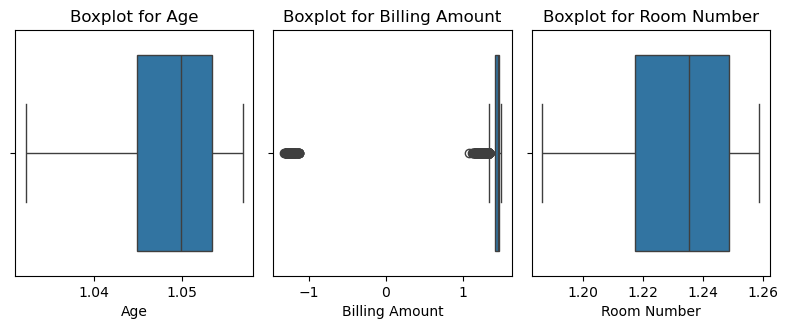

In [114]:
# Visualize outliers using boxplots

plt.figure(figsize=(8, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)  # Adjust the subplot layout based on the number of numerical columns
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

In [116]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Remove outliers for 'Billing Amount' column
data_no_outliers = remove_outliers_iqr(data, ['Billing Amount'])

# Check the shape of the dataset before and after removing outliers
print(f"Original data shape: {data.shape}")
print(f"Shape after removing outliers: {data_no_outliers.shape}")

Original data shape: (54966, 15)
Shape after removing outliers: (53275, 15)


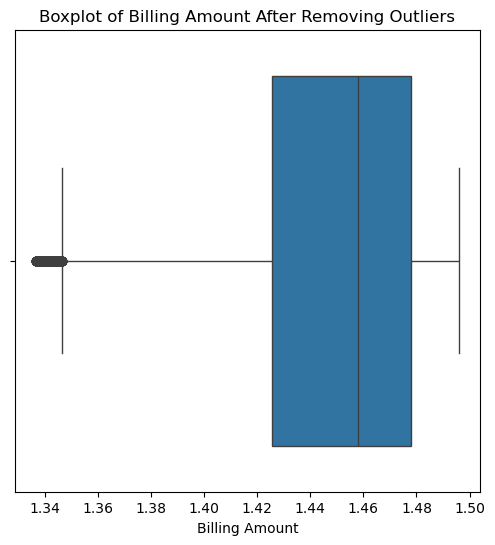

In [120]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=data_no_outliers['Billing Amount'])
plt.title('Boxplot of Billing Amount After Removing Outliers')
plt.show()

In [122]:
# Check the skewness of all numerical columns
skewness = data[numerical_columns].skew()
print("Skewness of Numerical olumns:")
print(skewness)

Skewness of Numerical olumns:
Age               -0.554525
Billing Amount   -18.698040
Room Number       -0.540509
dtype: float64


In [124]:
# Apply cube root transformation for negetive data
data['Age'] = np.cbrt(data['Age'])
data['Billing Amount'] = np.cbrt(data['Billing Amount'])
data['Room Number'] = np.cbrt(data['Room Number'])

# Check skewness after transformation
print(f"Skewness of 'Age' after cube root transformation: {data['Age'].skew()}")
print(f"Skewness of 'Billing Amount' after cube root transformation: {data['Billing Amount'].skew()}")
print(f"Skewness of 'Room Number' after cube root transformation: {data['Room Number'].skew()}")

Skewness of 'Age' after cube root transformation: -0.5595611333512905
Skewness of 'Billing Amount' after cube root transformation: -22.2199592780458
Skewness of 'Room Number' after cube root transformation: -0.5553343848847994


In [126]:
# Check skewness after all transformations
new_skewness = data[numerical_columns].skew()
print("Skewness after transformations:")
print(new_skewness)

Skewness after transformations:
Age               -0.559561
Billing Amount   -22.219959
Room Number       -0.555334
dtype: float64


----------------------------------

## Exploratory Data Analysis (EDA)

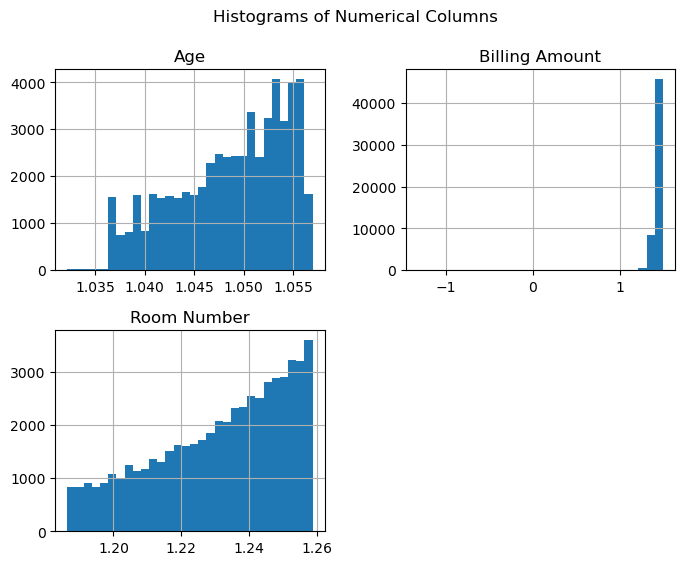

In [82]:
# Plot histograms for numerical columns
data[numerical_columns].hist(bins=30, figsize=(8, 6))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

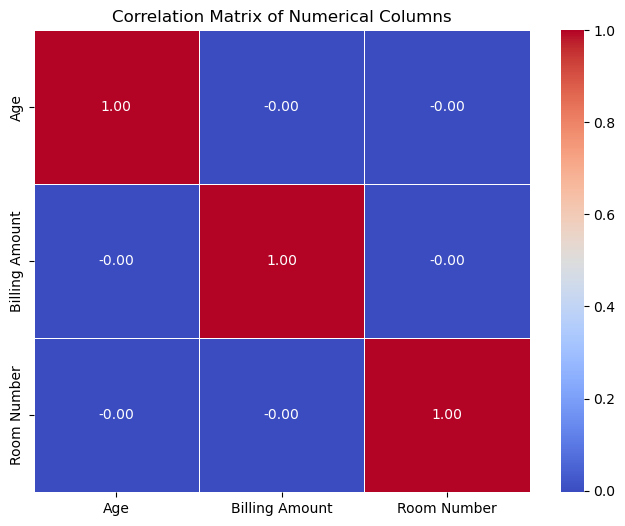

In [86]:
# Correlation heatmap to visualize relationships between numerical columns
corr_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

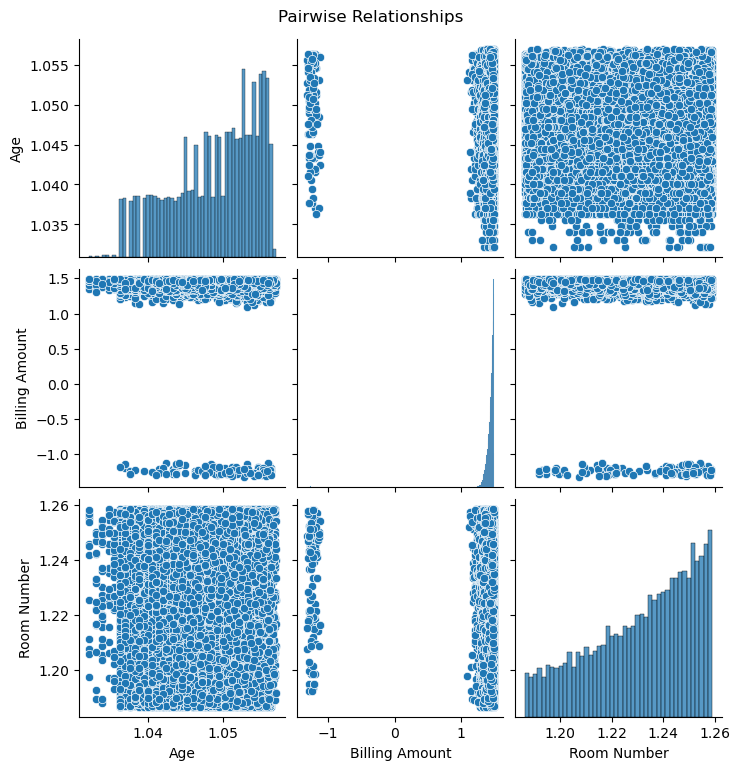

In [88]:
# Pair plot to visualize relationships between numerical columns
sns.pairplot(data[numerical_columns])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

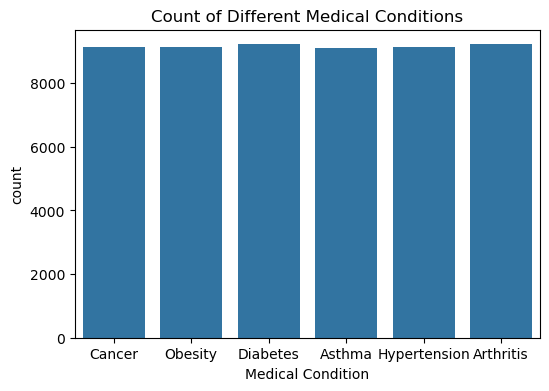

In [94]:
# Bar plot for categorical column (e.g., 'Medical Condition')
plt.figure(figsize=(6, 4))
sns.countplot(x='Medical Condition', data=data)
plt.title('Count of Different Medical Conditions')
plt.show()

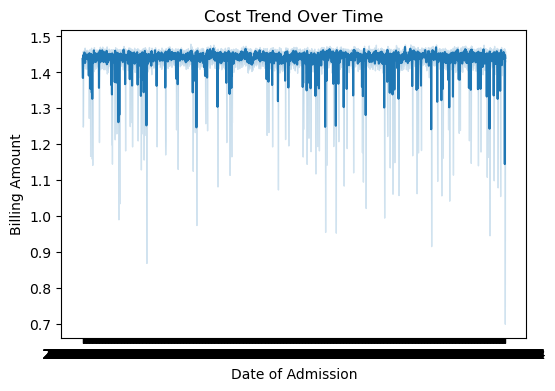

In [102]:
# Line plot for time-series data (if applicable, e.g., cost over time)
# For example, if there is a 'Date' column
plt.figure(figsize=(6, 4))
sns.lineplot(x='Date of Admission', y='Billing Amount', data=data)
plt.title('Cost Trend Over Time')
plt.show()

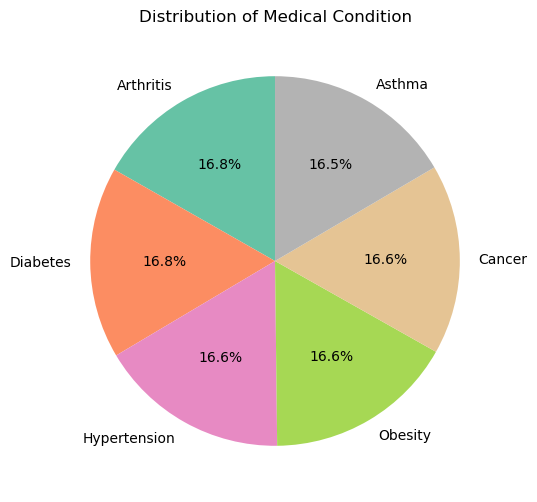

In [131]:
# Pie chart for categorical column (e.g., 'Medical Condition')
condition_counts = data['Medical Condition'].value_counts()
plt.figure(figsize=(8, 6))
condition_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Distribution of Medical Condition')
plt.ylabel('')
plt.show()


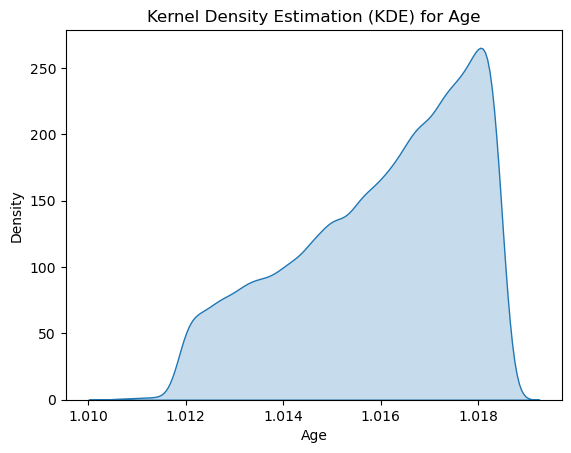

In [139]:
# KDE plot for a numerical column 
sns.kdeplot(data['Age'], fill=True)
plt.title('Kernel Density Estimation (KDE) for Age')
plt.show()

----------

## Feature Engineering


In [176]:
# Identify categorical features in the dataset
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns

print("Categorical columns:")
print(categorical_columns)

Categorical columns:
Index([], dtype='object')


In [178]:
# Apply Label Encoding to categorical features with an order
label_encoder = LabelEncoder()

# Encode each categorical column (if applicable)
for col in categorical_columns:
    
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,3068,1.014095,1,5,2,1729,26612,29933,1,1.129233,1.074138,2,1730,3,2
1,15211,1.017129,1,0,5,104,33648,16012,3,1.137333,1.071314,1,109,1,1
2,6476,1.017982,0,1,5,1233,37828,5473,0,1.134735,1.067924,1,1247,0,2
3,26935,1.013807,0,6,3,560,22511,12317,3,1.139011,1.078340,0,589,1,0
4,26241,1.015599,0,2,2,1230,21259,33598,0,1.125323,1.078575,2,1249,4,0


In [180]:
# Check the data types and verify the transformation

print(data.dtypes)

Name                    int64
Age                   float64
Gender                  int64
Blood Type              int64
Medical Condition       int64
Date of Admission       int64
Doctor                  int64
Hospital                int64
Insurance Provider      int64
Billing Amount        float64
Room Number           float64
Admission Type          int64
Discharge Date          int64
Medication              int64
Test Results            int64
dtype: object


------------

## Feature Selection

In [203]:
# Check the distribution of the target variable
print(data['Medical Condition'].value_counts())

Medical Condition
0    9218
3    9216
4    9151
5    9146
2    9140
1    9095
Name: count, dtype: int64


In [209]:
# Split the data into features (X) and target (y)

x = data.drop('Medical Condition', axis=1)  # Drop target column to get features
y = data['Medical Condition']              # Target variable

In [211]:
# Split into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape)


(43972, 14) (10994, 14)


In [213]:
# Random Forest for Feature Importance

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x, y)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances from Random Forest:" ,feature_importances)



Feature Importances from Random Forest:                Feature  Importance
8       Billing Amount    0.102597
6             Hospital    0.102250
0                 Name    0.102223
5               Doctor    0.102162
9          Room Number    0.098871
11      Discharge Date    0.091883
4    Date of Admission    0.091770
1                  Age    0.087205
3           Blood Type    0.055410
7   Insurance Provider    0.044546
12          Medication    0.043369
10      Admission Type    0.029190
13        Test Results    0.028907
2               Gender    0.019617


In [219]:
# Select K Best for Feature Selection

# Scale the features (required for chi-squared test)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Select K Best with chi-squared test
selector = SelectKBest(score_func=chi2, k=5)  # Select the top 5 features
X_new = selector.fit_transform(X_scaled, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Top Features Selected using Select K Best:")
print(selected_features)

# Visualize feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("Feature Scores from Select K Best:")
print(feature_scores)



Top Features Selected using Select K Best:
Index(['Name', 'Date of Admission', 'Admission Type', 'Discharge Date',
       'Test Results'],
      dtype='object')
Feature Scores from Select K Best:
               Feature     Score
13        Test Results  3.992558
10      Admission Type  3.748725
0                 Name  1.064279
4    Date of Admission  0.989081
11      Discharge Date  0.944920
3           Blood Type  0.933202
7   Insurance Provider  0.873614
12          Medication  0.859584
5               Doctor  0.800824
6             Hospital  0.751148
2               Gender  0.535789
9          Room Number  0.386192
1                  Age  0.207353
8       Billing Amount  0.005793


In [229]:
# Keep only important features from Select K Best
important_features = selected_features  # Use top features identified by Select K Best
data_selected = data[important_features]

# Add the target variable back to the dataset
data_selected['Medical Condition'] = y

print("Dataset after Feature Selection:")
print(data_selected.head())

Dataset after Feature Selection:
    Name  Date of Admission  Admission Type  Discharge Date  Test Results  \
0   3068               1729               2            1730             2   
1  15211                104               1             109             1   
2   6476               1233               1            1247             2   
3  26935                560               0             589             0   
4  26241               1230               2            1249             0   

   Medical Condition  
0                  2  
1                  5  
2                  5  
3                  3  
4                  2  


C:\Users\fari1\AppData\Local\Temp\ipykernel_9412\4213389022.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Medical Condition'] = y
